In [1]:
from pycalphad import Database, Model, variables as v
from pycalphad.tests.datasets import ROSE_TDB

In [2]:
from pycalphad import equilibrium
import numpy as np

my_phases_rose = ['TEST']
comps = ['H', 'HE', 'LI', 'BE', 'B', 'C', 'N', 'O', 'F']
comps = sorted(comps)
conds = dict({v.T: 1000, v.P: 101325})
for comp in comps[1:]:
    conds[v.X(comp)] = 1.0/float(len(comps))
dbf = Database(ROSE_TDB)
res_x = []
res_y = []
for pdens in np.logspace(2, 3.3, num=30):
    eqx = equilibrium(Database(ROSE_TDB), comps, my_phases_rose, conds, calc_opts={'pdens': int(pdens)})
    res_x.append(int(pdens))
    res_y.append(eqx.GM)

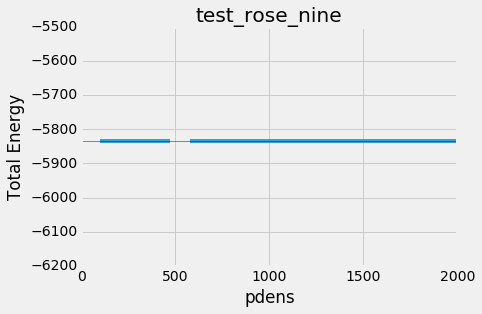

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('fivethirtyeight')

plt.plot(np.array(res_x), np.array([float(y) for y in res_y]))
plt.gca().axhline(y=-5.8351e3, xmin=0, xmax=2000, linewidth=0.5)
plt.xlabel('pdens')
plt.ylabel('Total Energy')
plt.title('test_rose_nine')

In [4]:
eqx.MU

<xarray.DataArray 'MU' (P: 1, T: 1, X_BE: 1, X_C: 1, X_F: 1, X_H: 1, X_HE: 1, X_LI: 1, X_N: 1, X_O: 1, component: 9)>
array([[[[[[[[[[[-5835.099181, -5835.099171, -5835.099185, -5835.099181,
                 -5835.099171, -5835.099177, -5835.099173, -5835.099166,
                 -5835.09918 ]]]]]]]]]]])
Coordinates:
  * P          (P) float64 1.013e+05
  * X_N        (X_N) float64 0.1111
  * X_F        (X_F) float64 0.1111
  * X_C        (X_C) float64 0.1111
  * X_HE       (X_HE) float64 0.1111
  * X_LI       (X_LI) float64 0.1111
  * X_H        (X_H) float64 0.1111
  * T          (T) float64 1e+03
  * X_BE       (X_BE) float64 0.1111
  * X_O        (X_O) float64 0.1111
  * component  (component) <U2 'B' 'BE' 'C' 'F' 'H' 'HE' 'LI' 'N' 'O'

In [5]:
eqx.X

<xarray.DataArray 'X' (P: 1, T: 1, X_BE: 1, X_C: 1, X_F: 1, X_H: 1, X_HE: 1, X_LI: 1, X_N: 1, X_O: 1, vertex: 9, component: 9)>
array([[[[[[[[[[[[ 0.001249,  0.001249,  0.001249,  0.001249,  0.001249,
                   0.495627,  0.495627,  0.001249,  0.001249],
                 [ 0.001249,  0.001249,  0.495627,  0.001249,  0.001249,
                   0.001249,  0.001249,  0.001249,  0.495627],
                 [ 0.495627,  0.001249,  0.001249,  0.001249,  0.495627,
                   0.001249,  0.001249,  0.001249,  0.001249],
                 [ 0.001249,  0.001249,  0.001249,  0.495627,  0.001249,
                   0.495627,  0.001249,  0.001249,  0.001249],
                 [ 0.001249,  0.495627,  0.001249,  0.001249,  0.001249,
                   0.001249,  0.001249,  0.495627,  0.001249],
                 [ 0.001249,  0.001249,  0.001249,  0.495627,  0.001249,
                   0.001249,  0.495627,  0.001249,  0.001249],
                 [      nan,       nan,       nan,      